In [1]:
from causalimpact import CausalImpact

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [6]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima_process import arma_generate_sample
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15, 6)

np.random.seed(1)

x1 = arma_generate_sample(ar=[0.999], ma=[0.9], nsample=100) + 100
y = 1.2 * x1 + np.random.randn(100)

y[71:100] = y[71:100] + 10
data = pd.DataFrame(np.array([y, x1]).T, columns=["y","x1"])

In [7]:
data.shape
data.head()

,y,x1
0,121.308920,101.463374
1,120.563149,99.448868
2,119.832495,99.524170
3,119.433612,99.033362
4,119.840664,100.779647


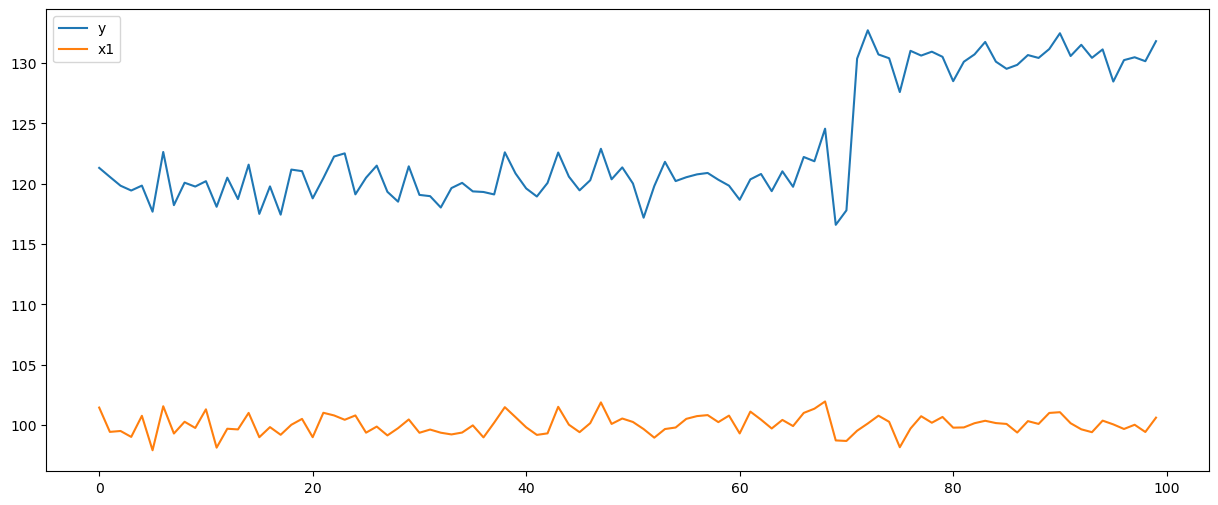

In [8]:
data.plot();

In [9]:
pre_period = [0,69]
post_period = [71,99]

In [10]:
impact = CausalImpact(data, pre_period, post_period)

In [11]:
impact.run()

c:\anaconda\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


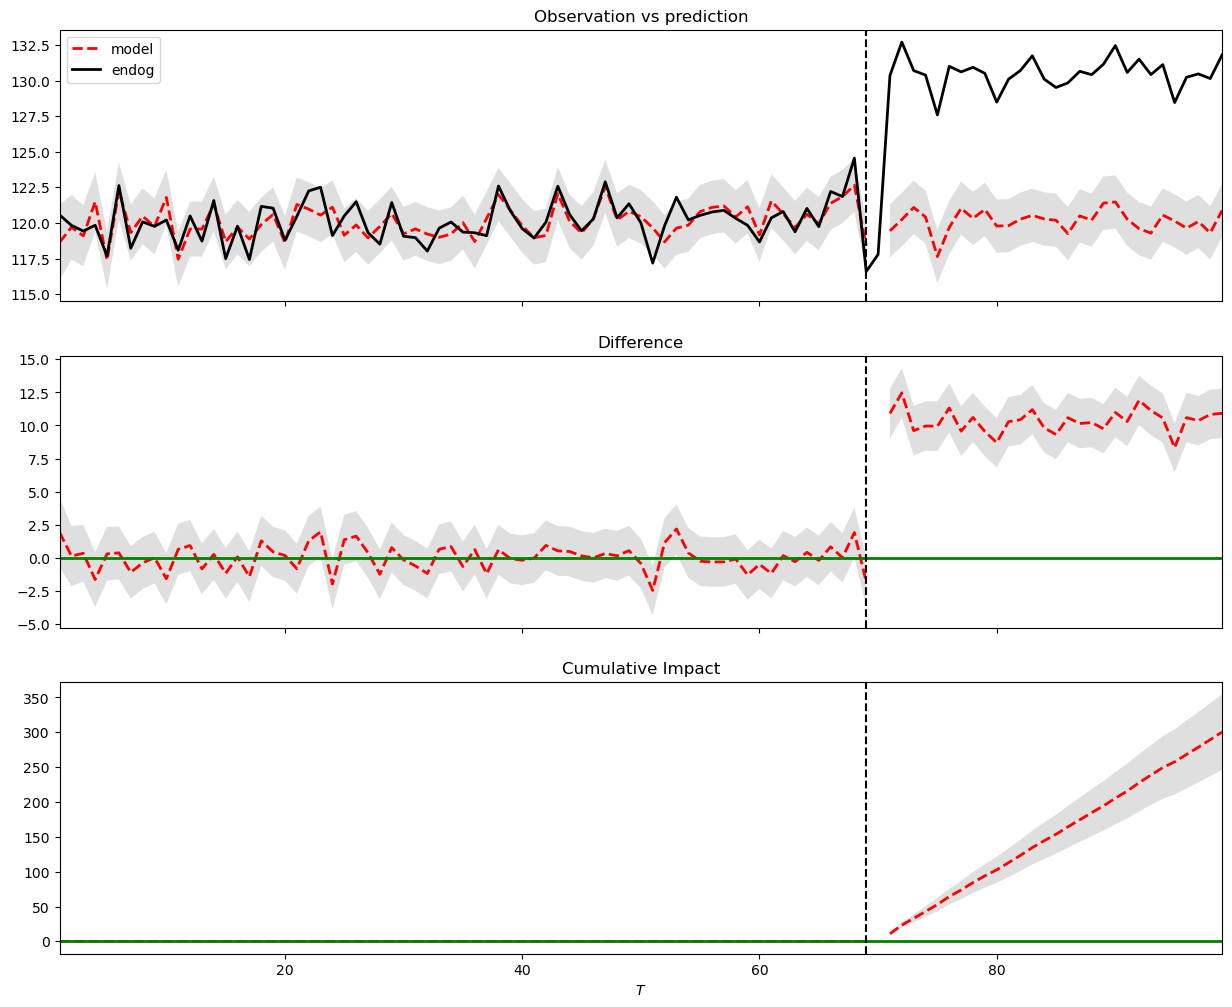

In [12]:
impact.plot()

In [13]:
date_range = pd.date_range(start="2014-01-01", periods=100)
ts_data = data.copy()
ts_data.index = date_range
ts_data.head()

,y,x1
2014-01-01,121.308920,101.463374
2014-01-02,120.563149,99.448868
2014-01-03,119.832495,99.524170
2014-01-04,119.433612,99.033362
2014-01-05,119.840664,100.779647


In [14]:
ts_pre_period = [pd.to_datetime(date) for date in ["2014-01-01", "2014-03-12"]]
ts_post_period = [pd.to_datetime(date) for date in ["2014-03-13", "2014-04-10"]]

In [15]:
ts_impact = CausalImpact(ts_data, ts_pre_period, ts_post_period)
ts_impact.run()

c:\anaconda\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [16]:
ts_impact.inferences.head(2)

,response,cum_response,point_pred,point_pred_lower,point_pred_upper,cum_pred,cum_pred_lower,cum_pred_upper,point_effect,point_effect_lower,point_effect_upper,cum_effect,cum_effect_lower,cum_effect_upper
2014-01-01,121.308920,121.30892,121.994854,-2804.815502,3048.805211,121.994854,-2804.815502,3048.805211,-0.685934,2926.124423,-2927.496290,0.0,0.0,0.0
2014-01-02,120.563149,241.87207,118.618185,116.007655,121.228715,240.613039,-2688.807848,3170.033926,1.944964,4.555495,-0.665566,0.0,0.0,0.0


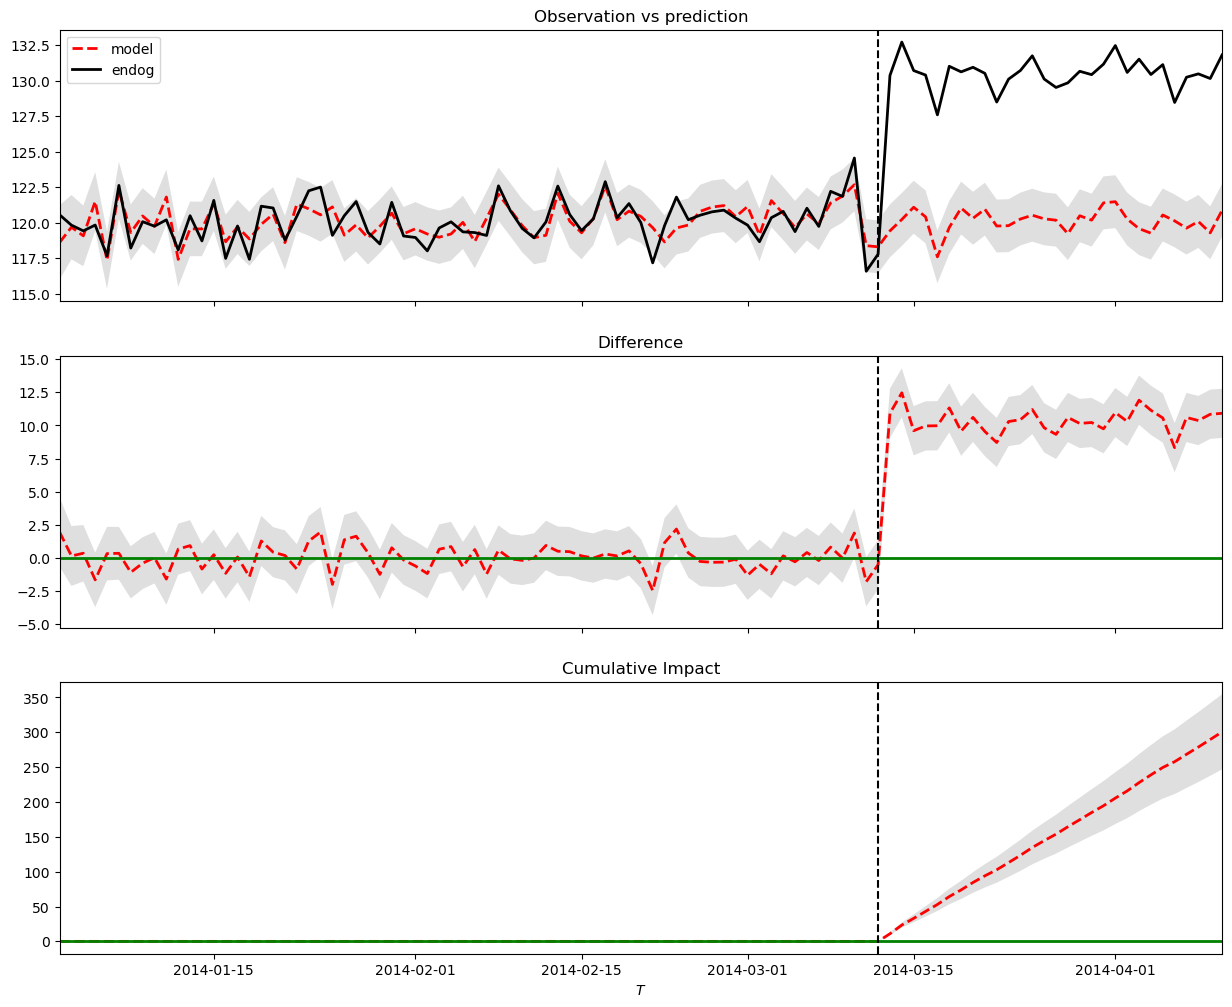

In [17]:
ts_impact.plot()

In [18]:
ts_impact.summary()

                              Average     Cumulative
Actual                            130           3784
Predicted                         120           3484
95% CI                     [118, 122]   [3430, 3538]
                                                    
Absolute Effect                    10            300
95% CI                        [12, 8]     [354, 246]
                                                    
Relative Effect                  8.6%           8.6%
95% CI                  [10.2%, 7.1%]  [10.2%, 7.1%]
                                                    
P-value                          0.0%               
Prob. of Causal Effect         100.0%               
